## 64

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Conv1D, Embedding, Flatten
from tensorflow.keras.models import Sequential, Model

inputs = Input(name='inputs',shape=[max_len])
lstmmodel = Sequential()
lstmmodel = Embedding(input_dim = max_len + 1,output_dim = 50,input_length=max_len)(inputs)
lstmmodel = LSTM(64)(lstmmodel)
lstmmodel = Flatten()(lstmmodel)

lstmmodel = Dense(256,name='FC1')(lstmmodel)
lstmmodel = Activation('relu')(lstmmodel)
lstmmodel = Dropout(0.5)(lstmmodel)

lstmmodel = Dense(1,name='out_layer')(lstmmodel)
lstmmodel = Activation('sigmoid')(lstmmodel)
lstmmodel = Model(inputs=inputs,outputs=lstmmodel)

lstmmodel.summary()
lstmmodel.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['acc'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 50)]              0         
                                                                 
 embedding (Embedding)       (None, 50, 50)            2550      
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0     

In [ ]:
# Fitting the data onto model
import time
start = time.time()
history = lstmmodel.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=1000, verbose=2)
end  = time.time()
print("LSTM took {} milliseconds to train data.\n".format(end-start))

Epoch 1/30
2342/2342 - 25s - loss: 0.0341 - acc: 0.9886 - val_loss: 0.0342 - val_acc: 0.9885 - 25s/epoch - 11ms/step
Epoch 2/30
2342/2342 - 26s - loss: 0.0338 - acc: 0.9887 - val_loss: 0.0394 - val_acc: 0.9872 - 26s/epoch - 11ms/step
Epoch 3/30
2342/2342 - 27s - loss: 0.0336 - acc: 0.9889 - val_loss: 0.0348 - val_acc: 0.9883 - 27s/epoch - 12ms/step
Epoch 4/30
2342/2342 - 25s - loss: 0.0335 - acc: 0.9888 - val_loss: 0.0482 - val_acc: 0.9844 - 25s/epoch - 11ms/step
Epoch 5/30
2342/2342 - 25s - loss: 0.0332 - acc: 0.9888 - val_loss: 0.0413 - val_acc: 0.9861 - 25s/epoch - 11ms/step
Epoch 6/30
2342/2342 - 24s - loss: 0.0331 - acc: 0.9889 - val_loss: 0.0341 - val_acc: 0.9888 - 24s/epoch - 10ms/step
Epoch 7/30
2342/2342 - 23s - loss: 0.0328 - acc: 0.9890 - val_loss: 0.0327 - val_acc: 0.9890 - 23s/epoch - 10ms/step
Epoch 8/30
2342/2342 - 23s - loss: 0.0326 - acc: 0.9891 - val_loss: 0.0437 - val_acc: 0.9853 - 23s/epoch - 10ms/step
Epoch 9/30
2342/2342 - 23s - loss: 0.0324 - acc: 0.9892 - val_lo

In [ ]:
loss, accuracy = lstmmodel.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = lstmmodel.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy)) 

Training Accuracy: 0.9903
Testing Accuracy:  0.9884


In [ ]:
start=time.time()
y_pred1 = lstmmodel.predict(X_test)
y_pred1=(y_pred1 > 0.5)
end  = time.time()
print("LSTM took {} milliseconds to train data.\n".format(end-start))

LSTM took 26.399731159210205 milliseconds to train data.



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

           0       1.00      0.99      0.99    293019
           1       0.97      0.99      0.98    122309

    accuracy                           0.99    415328
   macro avg       0.98      0.99      0.99    415328
weighted avg       0.99      0.99      0.99    415328





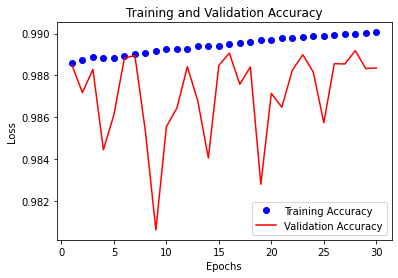

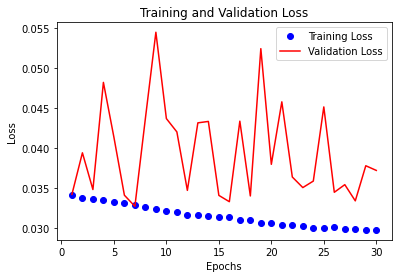

In [ ]:
def Training_and_validation_plot(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
Training_and_validation_plot(history)

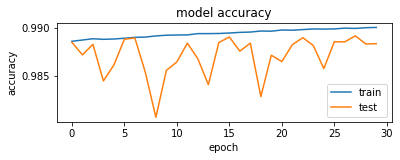

In [ ]:
import matplotlib.pyplot as plot
plot.subplot(2,1,1)
plot.plot(history.history['acc'])
plot.plot(history.history['val_acc'])
plot.title('model accuracy')
plot.ylabel('accuracy')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='lower right')

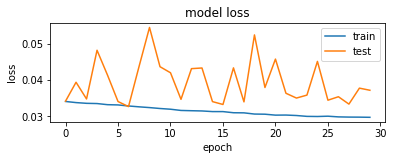

In [ ]:
plot.subplot(2,1,2)
plot.plot(history.history['loss'])
plot.plot(history.history['val_loss'])
plot.title('model loss')
plot.ylabel('loss')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='upper right')

In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/Blstmmodel64.sav'
pickle.dump(lstmmodel, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://a2729d5f-b183-43df-b98f-a7d5235df4a3/assets


INFO:tensorflow:Assets written to: ram://a2729d5f-b183-43df-b98f-a7d5235df4a3/assets


### 32

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Conv1D, Embedding, Flatten
from tensorflow.keras.models import Sequential, Model

inputs = Input(name='inputs',shape=[max_len])
lstmmodel = Sequential()
lstmmodel = Embedding(input_dim = max_len + 1,output_dim = 50,input_length=max_len)(inputs)
lstmmodel = LSTM(32)(lstmmodel)
lstmmodel = Flatten()(lstmmodel)

lstmmodel = Dense(256,name='FC1')(lstmmodel)
lstmmodel = Activation('relu')(lstmmodel)
lstmmodel = Dropout(0.5)(lstmmodel)

lstmmodel = Dense(1,name='out_layer')(lstmmodel)
lstmmodel = Activation('sigmoid')(lstmmodel)
lstmmodel = Model(inputs=inputs,outputs=lstmmodel)

lstmmodel.summary()
lstmmodel.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['acc'])

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 50)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 50, 50)            2550      
                                                                 
 lstm_1 (LSTM)               (None, 32)                10624     
                                                                 
 flatten_1 (Flatten)         (None, 32)                0         
                                                                 
 FC1 (Dense)                 (None, 256)               8448      
                                                                 
 activation_2 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0   

In [ ]:
# Fitting the data onto model
import time
start = time.time()
history = lstmmodel.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=1000, verbose=2)
end  = time.time()
print("LSTM took {} milliseconds to train data.\n".format(end-start))

Epoch 1/30
2342/2342 - 23s - loss: 0.1938 - acc: 0.9247 - val_loss: 0.1859 - val_acc: 0.9310 - 23s/epoch - 10ms/step
Epoch 2/30
2342/2342 - 17s - loss: 0.1180 - acc: 0.9603 - val_loss: 0.1088 - val_acc: 0.9624 - 17s/epoch - 7ms/step
Epoch 3/30
2342/2342 - 20s - loss: 0.0915 - acc: 0.9695 - val_loss: 0.1207 - val_acc: 0.9559 - 20s/epoch - 8ms/step
Epoch 4/30
2342/2342 - 17s - loss: 0.0775 - acc: 0.9742 - val_loss: 0.1022 - val_acc: 0.9632 - 17s/epoch - 7ms/step
Epoch 5/30
2342/2342 - 17s - loss: 0.0680 - acc: 0.9776 - val_loss: 0.0643 - val_acc: 0.9774 - 17s/epoch - 7ms/step
Epoch 6/30
2342/2342 - 18s - loss: 0.0628 - acc: 0.9793 - val_loss: 0.0609 - val_acc: 0.9790 - 18s/epoch - 8ms/step
Epoch 7/30
2342/2342 - 17s - loss: 0.0592 - acc: 0.9806 - val_loss: 0.0564 - val_acc: 0.9810 - 17s/epoch - 7ms/step
Epoch 8/30
2342/2342 - 17s - loss: 0.0567 - acc: 0.9814 - val_loss: 0.0542 - val_acc: 0.9812 - 17s/epoch - 7ms/step
Epoch 9/30
2342/2342 - 18s - loss: 0.0548 - acc: 0.9821 - val_loss: 0.0

In [ ]:
loss, accuracy = lstmmodel.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = lstmmodel.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy)) 

Training Accuracy: 0.9864
Testing Accuracy:  0.9843


In [ ]:
start=time.time()
y_pred1 = lstmmodel.predict(X_test)
y_pred1=(y_pred1 > 0.5)
end  = time.time()
print("LSTM took {} milliseconds to train data.\n".format(end-start))

LSTM took 27.36300230026245 milliseconds to train data.



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

           0       1.00      0.98      0.99    293019
           1       0.96      0.99      0.97    122309

    accuracy                           0.98    415328
   macro avg       0.98      0.99      0.98    415328
weighted avg       0.98      0.98      0.98    415328





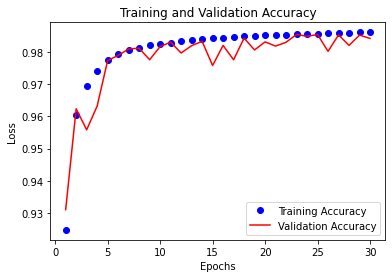

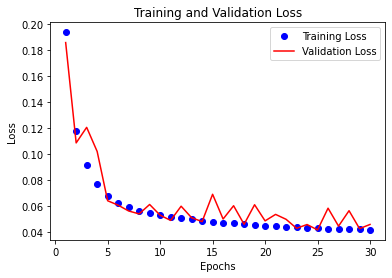

In [ ]:
def Training_and_validation_plot(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
Training_and_validation_plot(history)

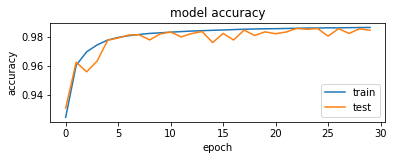

In [ ]:
import matplotlib.pyplot as plot
plot.subplot(2,1,1)
plot.plot(history.history['acc'])
plot.plot(history.history['val_acc'])
plot.title('model accuracy')
plot.ylabel('accuracy')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='lower right')

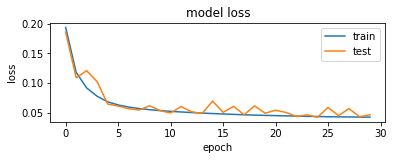

In [ ]:
plot.subplot(2,1,2)
plot.plot(history.history['loss'])
plot.plot(history.history['val_loss'])
plot.title('model loss')
plot.ylabel('loss')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='upper right')

## 128

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Conv1D, Embedding, Flatten
from tensorflow.keras.models import Sequential, Model

inputs = Input(name='inputs',shape=[max_len])
lstmmodel = Sequential()
lstmmodel = Embedding(input_dim = max_len + 1,output_dim = 50,input_length=max_len)(inputs)
lstmmodel = LSTM(128)(lstmmodel)
lstmmodel = Flatten()(lstmmodel)

lstmmodel = Dense(256,name='FC1')(lstmmodel)
lstmmodel = Activation('relu')(lstmmodel)
lstmmodel = Dropout(0.5)(lstmmodel)

lstmmodel = Dense(1,name='out_layer')(lstmmodel)
lstmmodel = Activation('sigmoid')(lstmmodel)
lstmmodel = Model(inputs=inputs,outputs=lstmmodel)

lstmmodel.summary()
lstmmodel.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['acc'])

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 50)]              0         
                                                                 
 embedding_2 (Embedding)     (None, 50, 50)            2550      
                                                                 
 lstm_2 (LSTM)               (None, 128)               91648     
                                                                 
 flatten_2 (Flatten)         (None, 128)               0         
                                                                 
 FC1 (Dense)                 (None, 256)               33024     
                                                                 
 activation_4 (Activation)   (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0   

In [ ]:
# Fitting the data onto model
import time
start = time.time()
history = lstmmodel.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=1000, verbose=2)
end  = time.time()
print("LSTM took {} milliseconds to train data.\n".format(end-start))

Epoch 1/30
2342/2342 - 44s - loss: 0.1810 - acc: 0.9311 - val_loss: 0.1132 - val_acc: 0.9580 - 44s/epoch - 19ms/step
Epoch 2/30
2342/2342 - 42s - loss: 0.0885 - acc: 0.9702 - val_loss: 0.0728 - val_acc: 0.9742 - 42s/epoch - 18ms/step
Epoch 3/30
2342/2342 - 42s - loss: 0.0619 - acc: 0.9794 - val_loss: 0.0561 - val_acc: 0.9805 - 42s/epoch - 18ms/step
Epoch 4/30
2342/2342 - 42s - loss: 0.0524 - acc: 0.9827 - val_loss: 0.0489 - val_acc: 0.9828 - 42s/epoch - 18ms/step
Epoch 5/30
2342/2342 - 42s - loss: 0.0471 - acc: 0.9845 - val_loss: 0.0541 - val_acc: 0.9831 - 42s/epoch - 18ms/step
Epoch 6/30
2342/2342 - 42s - loss: 0.0436 - acc: 0.9856 - val_loss: 0.0470 - val_acc: 0.9842 - 42s/epoch - 18ms/step
Epoch 7/30
2342/2342 - 41s - loss: 0.0406 - acc: 0.9865 - val_loss: 0.0398 - val_acc: 0.9861 - 41s/epoch - 18ms/step
Epoch 8/30
2342/2342 - 42s - loss: 0.0382 - acc: 0.9872 - val_loss: 0.0487 - val_acc: 0.9836 - 42s/epoch - 18ms/step
Epoch 9/30
2342/2342 - 42s - loss: 0.0363 - acc: 0.9878 - val_lo

In [ ]:
loss, accuracy = lstmmodel.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = lstmmodel.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy)) 

Training Accuracy: 0.9945
Testing Accuracy:  0.9881


In [ ]:
start=time.time()
y_pred1 = lstmmodel.predict(X_test)
y_pred1=(y_pred1 > 0.5)
end  = time.time()
print("LSTM took {} milliseconds to train data.\n".format(end-start))

LSTM took 41.273197174072266 milliseconds to train data.



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

           0       1.00      0.99      0.99    293019
           1       0.97      0.99      0.98    122309

    accuracy                           0.99    415328
   macro avg       0.98      0.99      0.99    415328
weighted avg       0.99      0.99      0.99    415328





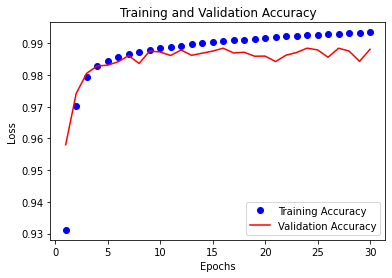

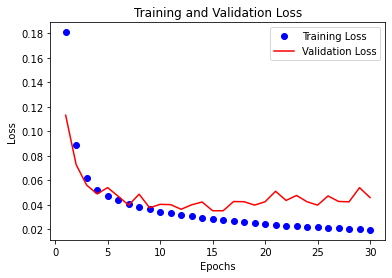

In [ ]:
def Training_and_validation_plot(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
Training_and_validation_plot(history)

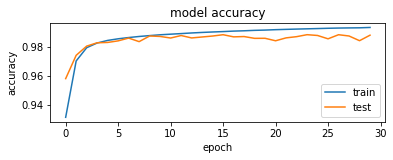

In [ ]:
import matplotlib.pyplot as plot
plot.subplot(2,1,1)
plot.plot(history.history['acc'])
plot.plot(history.history['val_acc'])
plot.title('model accuracy')
plot.ylabel('accuracy')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='lower right')

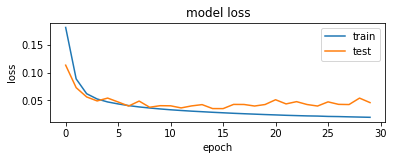

In [ ]:
plot.subplot(2,1,2)
plot.plot(history.history['loss'])
plot.plot(history.history['val_loss'])
plot.title('model loss')
plot.ylabel('loss')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='upper right')

In [ ]:
import pickle
filename = '/content/drive/My Drive/Colab Notebooks/Blstmmodel128.sav'
pickle.dump(lstmmodel, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://4c4c975d-9c9a-4558-b0c1-22322f06f536/assets


INFO:tensorflow:Assets written to: ram://4c4c975d-9c9a-4558-b0c1-22322f06f536/assets
